In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings

In [3]:
df_train = pd.read_csv('breast_cancer_wisconsin.csv')
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
print(f'df_train\n\n{df_train.isna().sum()}')

df_train

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
print(f'df_train\n\n{df_train.dtypes}')

df_train

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symm

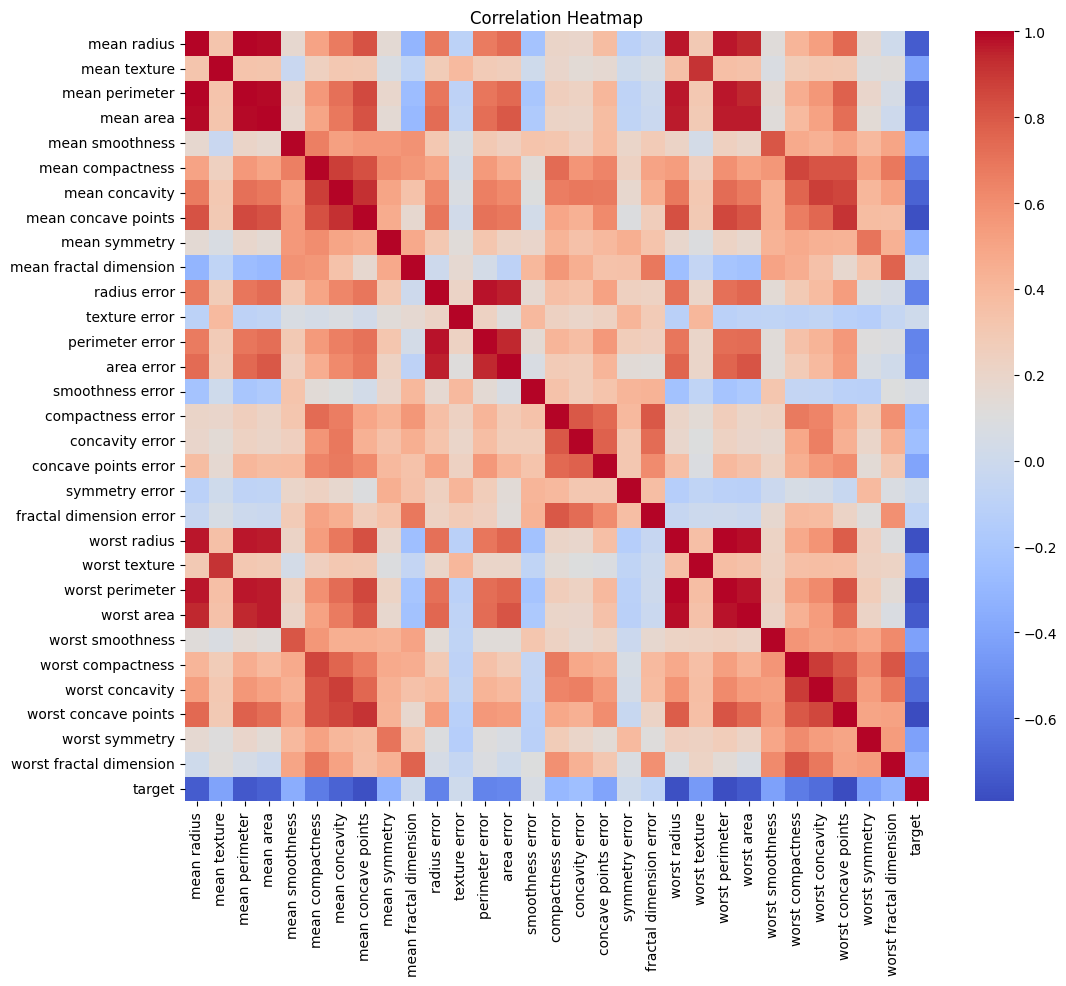

In [59]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

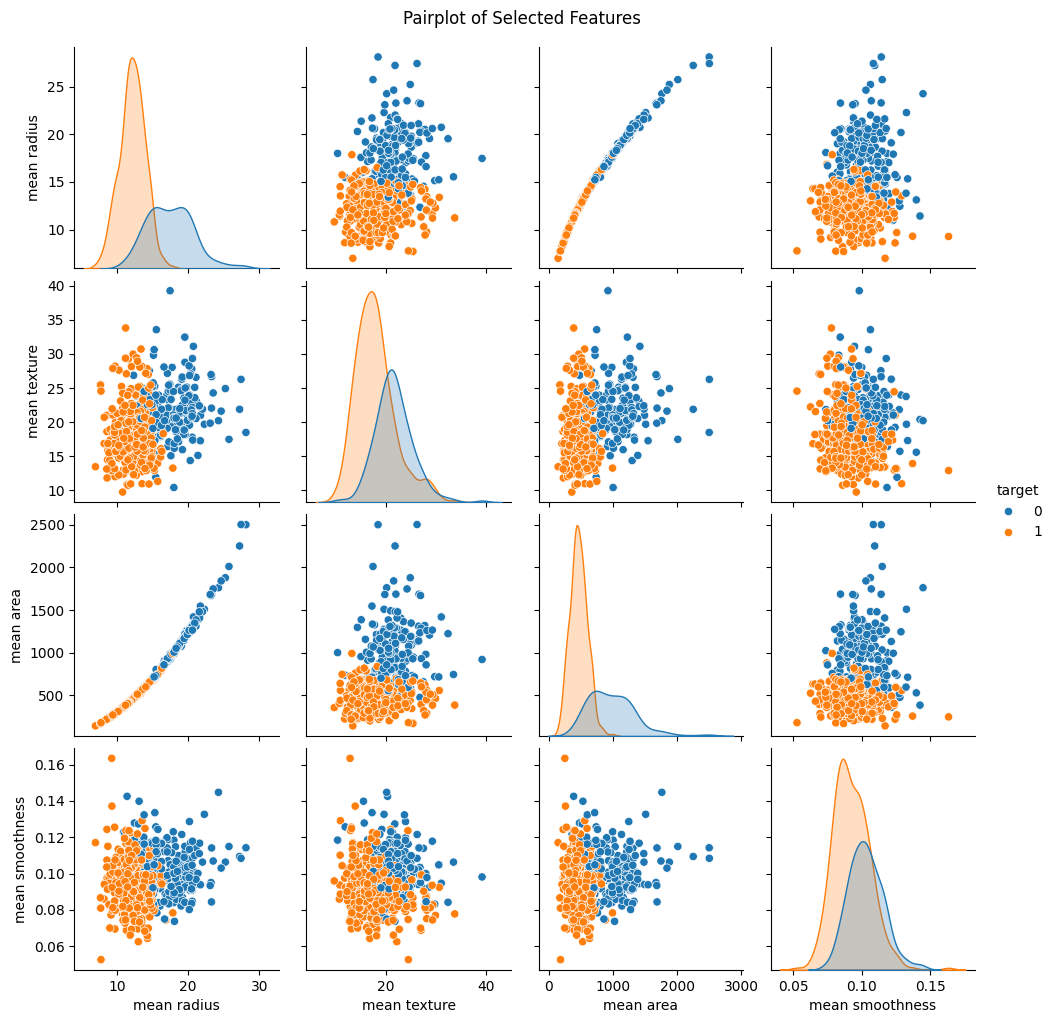

In [63]:
sns.pairplot(df_train[['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'target']], hue='target')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

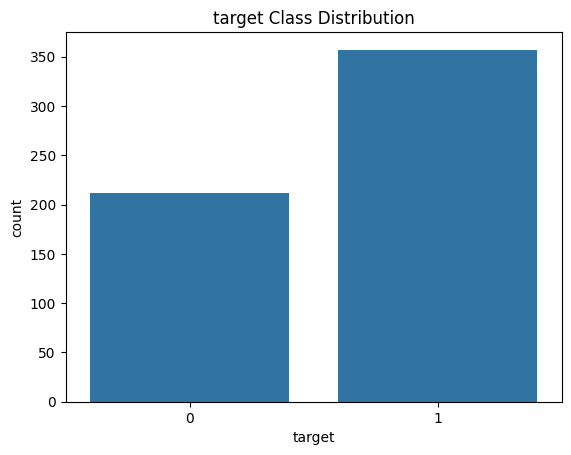

In [64]:
sns.countplot(data=df_train, x='target')
plt.title('target Class Distribution')
plt.show()

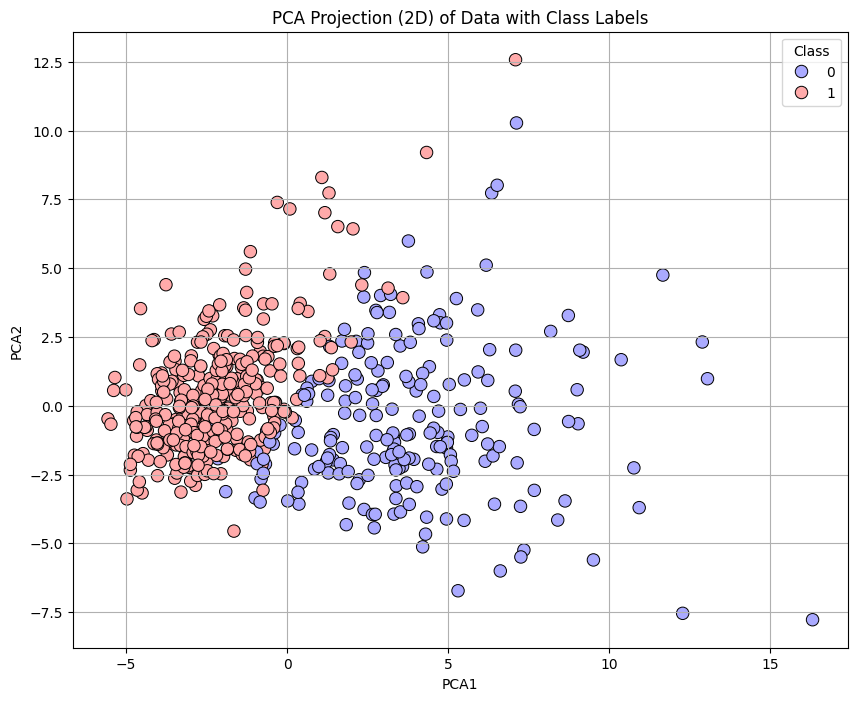

In [9]:
x = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

x_plot = x.copy()

st = StandardScaler()

x_plot = st.fit_transform(x_plot)

pca = PCA(n_components=2)
x_pca_plot = pca.fit_transform(x_plot)

df_pca = pd.DataFrame(x_pca_plot, columns=['PCA1', 'PCA2'])
df_pca['Target'] = y.values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Target', palette='bwr', edgecolor='k', s=80)
plt.title('PCA Projection (2D) of Data with Class Labels')
plt.grid(True)
plt.legend(title='Class')
plt.show()

## LogisticRegression

In [10]:
import warnings
warnings.simplefilter("ignore")

x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
}

samplers = {
    'none': None,
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4)
}

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

results_lr = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_lr.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_ROC_AUC': None,
                    'Test_ROC_AUC': None
                })
                continue

        lr = LogisticRegression(random_state=42, max_iter=5000)

        try:
            grid_search = GridSearchCV(
                estimator=lr,
                param_grid=param_grid,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1,
                error_score=0
            )
            grid_search.fit(x_res, y_res)

            best_lr = grid_search.best_estimator_

            y_proba_test = best_lr.predict_proba(x_test_scaled)[:, 1]
            y_proba_train = best_lr.predict_proba(x_res)[:, 1]

            results_lr.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_ROC_AUC': roc_auc_score(y_res, y_proba_train),
                'Test_ROC_AUC': roc_auc_score(y_test, y_proba_test)
            })

        except Exception as e:
            results_lr.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_ROC_AUC': None,
                'Test_ROC_AUC': None
            })

results_df_lr = pd.DataFrame(results_lr)
results_df_lr

,Scaler,Sampler,BestParams,Train_ROC_AUC,Test_ROC_AUC
0,standard,none,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.996471,0.996032
1,standard,ros,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.998338,0.995040
2,standard,smote,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.997045,0.997024
3,minmax,none,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.996347,0.995701
4,minmax,ros,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.998732,0.995040
5,minmax,smote,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.998781,0.995040
6,robust,none,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.996677,0.996362
7,robust,ros,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.998289,0.995701
8,robust,smote,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.997304,0.996362


In [ ]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

x_train_lr_scaled = x_train_lr.copy()
x_test_lr_scaled = x_test_lr.copy()

x_train_lr_scaled = scaler.fit_transform(x_train_lr)
x_test_lr_scaled = scaler.transform(x_test_lr)

lr_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

lr = LogisticRegression(**lr_params, random_state=42)
lr.fit(x_train_lr_scaled, y_train_lr)

y_proba_train_lr = lr.predict_proba(x_train_lr_scaled)[:, 1]
y_proba_test_lr = lr.predict_proba(x_test_lr_scaled)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train_lr, y_proba_train_lr):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test_lr, y_proba_test_lr):.4f}")

Train ROC AUC Score: 0.9965
Test ROC AUC Score: 0.9960


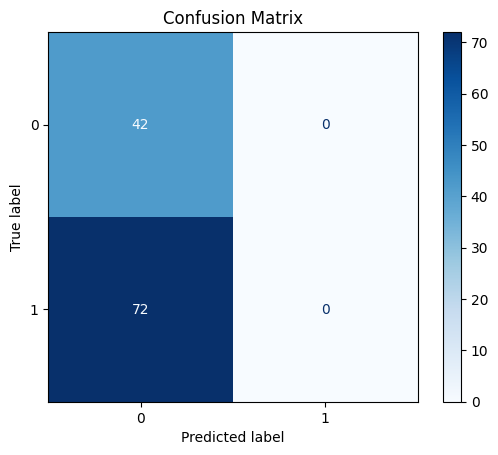

In [66]:
y_pred = lr.predict(x_test_lr)
cm = confusion_matrix(y_test_lr, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

score_train: 0.9901
score_test: 0.9878


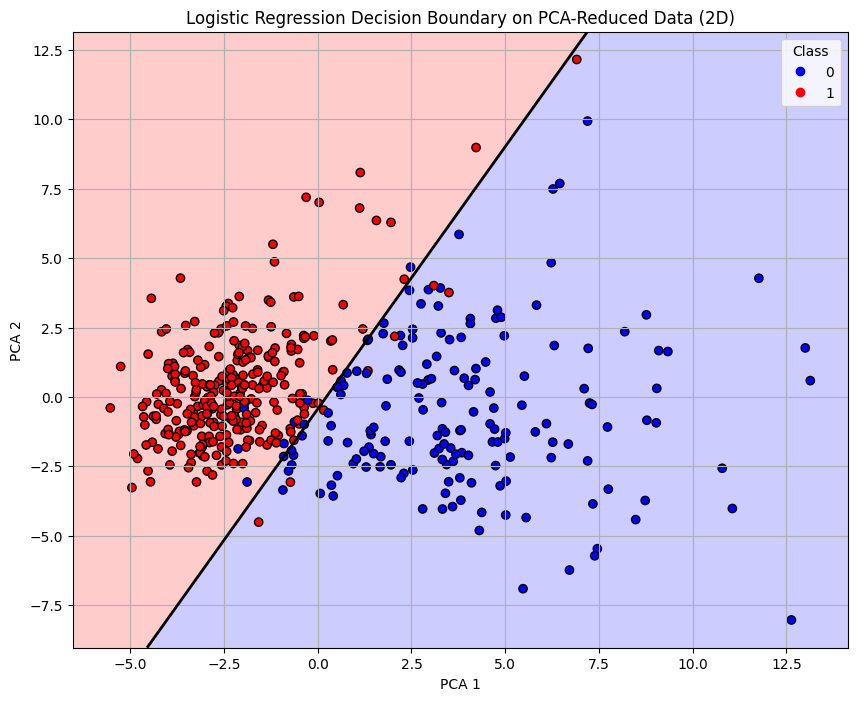

In [13]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

x_test_pca = pca.transform(x_test_scaled)

lr_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
lr = LogisticRegression(**lr_params, random_state=7)
lr.fit(x_train_pca, y_train)

y_proba_train = lr.predict_proba(x_train_pca)[:, 1]
y_proba_test = lr.predict_proba(x_test_pca)[:, 1]

print(f'score_train: {roc_auc_score(y_train, y_proba_train):.4f}')
print(f'score_test: {roc_auc_score(y_test, y_proba_test):.4f}')

x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Logistic Regression Decision Boundary on PCA-Reduced Data (2D)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.show()

## svm

In [14]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
}

samplers = {
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4),
    'none': None
}

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

results_svm = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled= scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_svm.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_ROC_AUC': None,
                    'Test_ROC_AUC': None
                })
                continue

        svm = SVC(probability=True, random_state=42)

        try:
            grid_search = GridSearchCV(
                estimator=svm,
                param_grid=param_grid,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_svm = grid_search.best_estimator_

            y_proba_train = best_svm.predict_proba(x_res)[:, 1]
            y_proba_test = best_svm.predict_proba(x_test_scaled)[:, 1]

            results_svm.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_ROC_AUC': roc_auc_score(y_res, y_proba_train),
                'Test_ROC_AUC': roc_auc_score(y_test, y_proba_test)
            })

        except Exception as e:
            results_svm.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_ROC_AUC': None,
                'Test_ROC_AUC': None
            })

results_df_svm = pd.DataFrame(results_svm)
results_df_svm.sort_values(by='Test_ROC_AUC', ascending=False).reset_index(drop=True)

,Scaler,Sampler,BestParams,Train_ROC_AUC,Test_ROC_AUC
0,minmax,none,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.999835,0.996362
1,robust,none,"{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.995583,0.996032
2,standard,ros,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.998375,0.996032
3,robust,ros,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.998289,0.995040
4,minmax,smote,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.999914,0.994709
5,standard,smote,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.999852,0.994378
6,minmax,ros,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.999877,0.994048
7,standard,none,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",0.999979,0.993717
8,robust,smote,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.999975,0.993717


In [68]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()

x_train_svm_scaled = x_train_svm.copy()
x_test_svm_scaled = x_test_svm.copy()

x_train_svm_scaled = scaler.fit_transform(x_train_svm)
x_test_svm_scaled = scaler.transform(x_test_svm)

svm_params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

svm = SVC(**svm_params, probability=True,random_state=42)
svm.fit(x_train_svm_scaled, y_train_svm)

y_proba_train_svm = svm.predict_proba(x_train_svm_scaled)[:, 1]
y_proba_test_svm = svm.predict_proba(x_test_svm_scaled)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train_svm, y_proba_train_svm):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test_svm, y_proba_test_svm):.4f}")

Train ROC AUC Score: 0.9946
Test ROC AUC Score: 0.9954


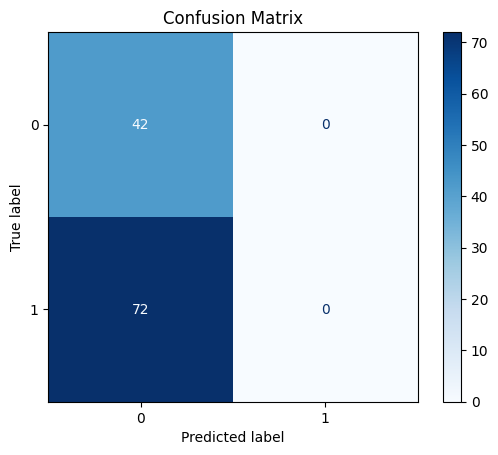

In [69]:
y_pred = svm.predict(x_test_svm)
cm = confusion_matrix(y_test_svm, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

score_train: 0.9903
score_test: 0.9884


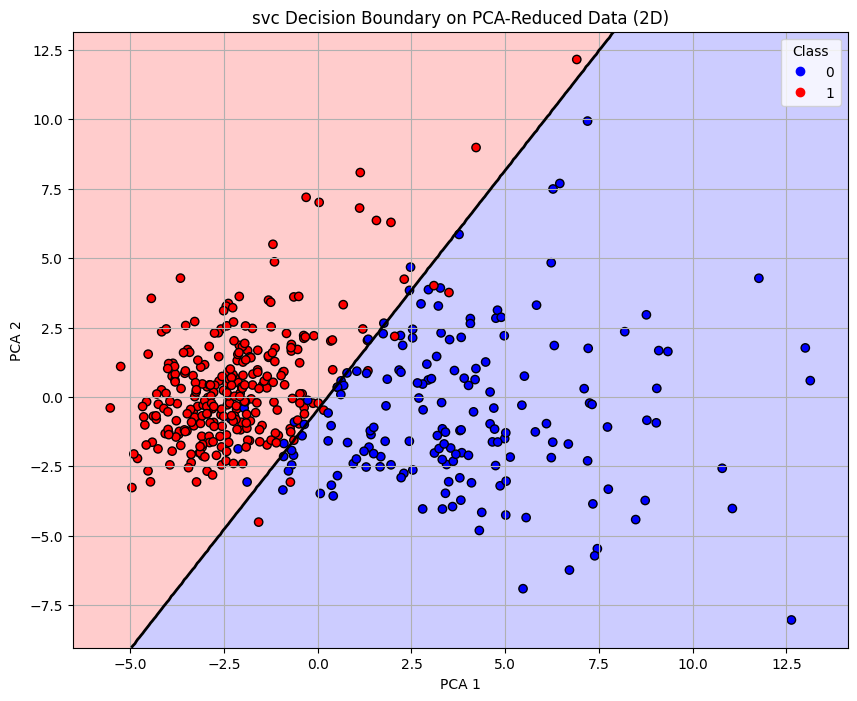

In [ ]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

svm_params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
svm = SVC(**svm_params, probability=True,random_state=42)
svm.fit(x_train_pca, y_train)

y_proba_train = svm.predict_proba(x_train_pca)[:, 1]
y_proba_test = svm.predict_proba(x_test_pca)[:, 1]

print(f'score_train: {roc_auc_score(y_train, y_proba_train):.4f}')
print(f'score_test: {roc_auc_score(y_test, y_proba_test):.4f}')

x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVC Decision Boundary on PCA-Reduced Data (2D)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.show()

## RandomForest

In [29]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
}

samplers = {
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4),
    'none': None
}

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

results_rf = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_rf.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_ROC_AUC': None,
                    'Test_ROC_AUC': None
                })
                continue

        rf = RandomForestClassifier(random_state=42)

        try:
            grid_search = GridSearchCV(
                estimator=rf,
                param_grid=param_grid,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_rf = grid_search.best_estimator_

            y_proba_train = best_rf.predict_proba(x_res)[:, 1]
            y_proba_test = best_rf.predict_proba(x_test_scaled)[:, 1]

            results_rf.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_ROC_AUC': roc_auc_score(y_res, y_proba_train),
                'Test_ROC_AUC': roc_auc_score(y_test, y_proba_test)
            })

        except Exception as e:
            results_rf.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_ROC_AUC': None,
                'Test_ROC_AUC': None
            })

results_df_rf = pd.DataFrame(results_rf)
results_df_rf.sort_values(by='Test_ROC_AUC', ascending=False).reset_index(drop=True)


,Scaler,Sampler,BestParams,Train_ROC_AUC,Test_ROC_AUC
0,robust,smote,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",1.0,0.994048
1,standard,ros,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",1.0,0.993386
2,minmax,ros,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",1.0,0.993386
3,robust,ros,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",1.0,0.993386
4,minmax,smote,"{'max_depth': 10, 'max_features': 'log2', 'min...",1.0,0.993056
5,standard,smote,"{'max_depth': 10, 'max_features': 'log2', 'min...",1.0,0.992890
6,standard,none,"{'max_depth': 20, 'max_features': 'log2', 'min...",1.0,0.992394
7,minmax,none,"{'max_depth': 20, 'max_features': 'log2', 'min...",1.0,0.992394
8,robust,none,"{'max_depth': 20, 'max_features': 'log2', 'min...",1.0,0.992394


In [70]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

x_train_rf_scaled = x_train_rf.copy()
x_test_rf_scaled = x_test_rf.copy()

x_train_rf_scaled = scaler.fit_transform(x_train_rf)
x_test_rf_scaled = scaler.transform(x_test_rf)

rf_params = {
    'max_depth': 4,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 9
}

rf = RandomForestClassifier(**rf_params, random_state=42)
rf.fit(x_train_rf_scaled, y_train_rf)

y_proba_train_rf = rf.predict_proba(x_train_rf_scaled)[:, 1]
y_proba_test_rf = rf.predict_proba(x_test_rf_scaled)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train_rf, y_proba_train_rf):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test_rf, y_proba_test_rf):.4f}")

Train ROC AUC Score: 0.9969
Test ROC AUC Score: 0.9921


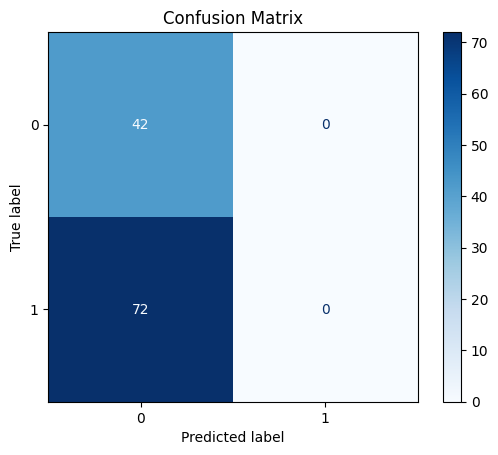

In [71]:
y_pred = rf.predict(x_test_rf)
cm = confusion_matrix(y_test_rf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Score Train: 1.0000
Score Test: 0.9813


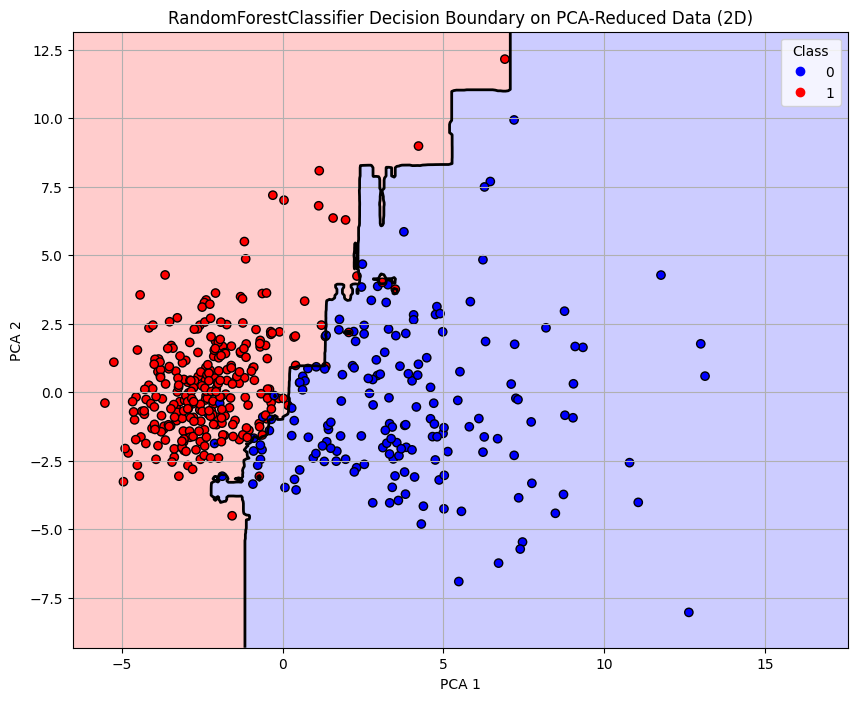

In [28]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

rf_params = {
    'max_depth': 40,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 500
}
rf = RandomForestClassifier(**rf_params, random_state=7)
rf.fit(x_train_pca, y_train)

y_proba_train = rf.predict_proba(x_train_pca)[:, 1]
y_proba_test = rf.predict_proba(x_test_pca)[:, 1]

print(f'Score Train: {roc_auc_score(y_train, y_proba_train):.4f}')
print(f'Score Test: {roc_auc_score(y_test, y_proba_test):.4f}')

x_all_pca = np.vstack([x_train_pca, x_test_pca])
x_min, x_max = x_all_pca[:, 0].min() - 1, x_all_pca[:, 0].max() + 1
y_min, y_max = x_all_pca[:, 1].min() - 1, x_all_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = rf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('RandomForestClassifier Decision Boundary on PCA-Reduced Data (2D)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.show()

## knn

In [31]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

samplers = {
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4),
    'none': None
}

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

results_knn = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_knn.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_ROC_AUC': None,
                    'Test_ROC_AUC': None
                })
                continue

        knn = KNeighborsClassifier()

        try:
            grid_search = GridSearchCV(
                estimator=knn,
                param_grid=param_grid,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_knn = grid_search.best_estimator_

            y_proba_train = best_knn.predict_proba(x_res)[:, 1]
            y_proba_test = best_knn.predict_proba(x_test_scaled)[:, 1]

            results_knn.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_ROC_AUC': roc_auc_score(y_res, y_proba_train),
                'Test_ROC_AUC': roc_auc_score(y_test, y_proba_test)
            })

        except Exception as e:
            results_knn.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_ROC_AUC': None,
                'Test_ROC_AUC': None
            })

results_df_knn = pd.DataFrame(results_knn)
results_df_knn.sort_values(by='Test_ROC_AUC', ascending=False).reset_index(drop=True)


,Scaler,Sampler,BestParams,Train_ROC_AUC,Test_ROC_AUC
0,robust,ros,"{'metric': 'euclidean', 'n_neighbors': 13, 'we...",1.0,0.994378
1,robust,none,"{'metric': 'euclidean', 'n_neighbors': 15, 'we...",1.0,0.993386
2,standard,none,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",1.0,0.993386
3,minmax,ros,"{'metric': 'manhattan', 'n_neighbors': 11, 'we...",1.0,0.992063
4,minmax,smote,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",1.0,0.990741
5,standard,smote,"{'metric': 'euclidean', 'n_neighbors': 13, 'we...",1.0,0.990079
6,minmax,none,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",1.0,0.988095
7,standard,ros,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",1.0,0.981812
8,robust,smote,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",1.0,0.981647


In [72]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_params = {
    'metric': 'euclidean',
    'n_neighbors': 13,
    'weights': 'distance'
}
knn = KNeighborsClassifier(**knn_params)

knn.fit(x_train_scaled, y_train)

y_proba_train = knn.predict_proba(x_train_scaled)[:, 1]
y_proba_test = knn.predict_proba(x_test_scaled)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train, y_proba_train):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}")

Train ROC AUC Score: 1.0000
Test ROC AUC Score: 0.9927


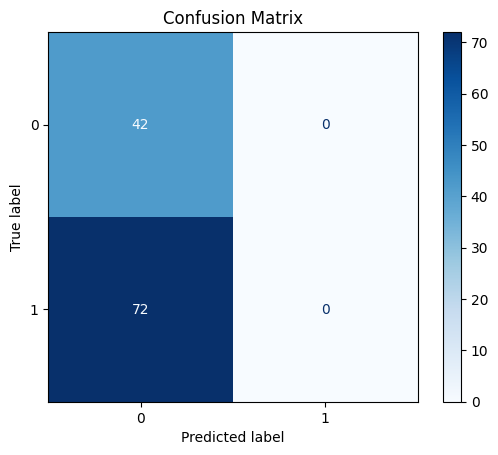

In [73]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

score_train: 1.0000
score_test: 0.9742


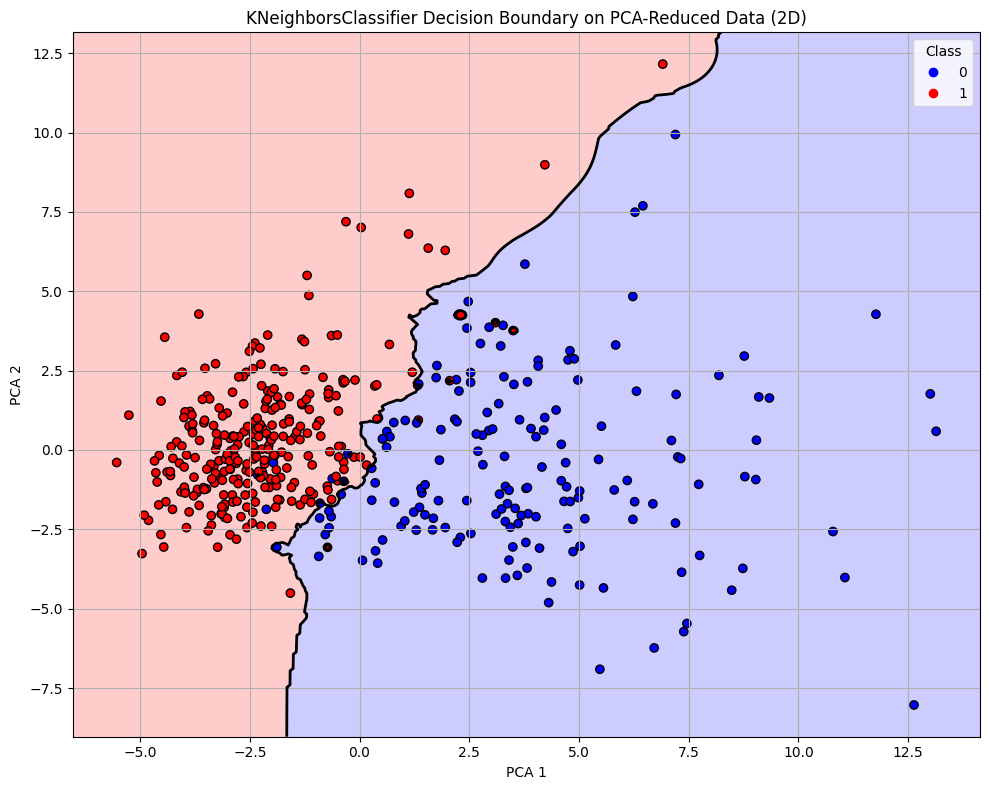

In [38]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

st = StandardScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

knn_params = {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
knn = KNeighborsClassifier(**knn_params)
knn.fit(x_train_pca, y_train)

y_proba_train = knn.predict_proba(x_train_pca)[:, 1]
y_proba_test = knn.predict_proba(x_test_pca)[:, 1]

print(f'score_train: {roc_auc_score(y_train, y_proba_train):.4f}')
print(f'score_test: {roc_auc_score(y_test, y_proba_test):.4f}')

x_min, x_max = np.min(x_train_pca[:, 0]) - 1, np.max(x_train_pca[:, 0]) + 1
y_min, y_max = np.min(x_train_pca[:, 1]) - 1, np.max(x_train_pca[:, 1]) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KNeighborsClassifier Decision Boundary on PCA-Reduced Data (2D)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()

## XGB

In [42]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

samplers = {
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4),
    'none': None 
}

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

results_xgb = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_xgb.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_ROC_AUC': None,
                    'Test_ROC_AUC': None
                })
                continue

        xgb = XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )

        try:
            grid_search = GridSearchCV(
                estimator=xgb,
                param_grid=param_grid,
                cv=3,
                scoring='roc_auc',
                n_jobs=-1,
            )
            grid_search.fit(x_res, y_res)

            best_xgb = grid_search.best_estimator_

            y_proba_train = best_xgb.predict_proba(x_res)[:, 1]
            y_proba_test = best_xgb.predict_proba(x_test_scaled)[:, 1]

            results_xgb.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_ROC_AUC': roc_auc_score(y_res, y_proba_train),
                'Test_ROC_AUC': roc_auc_score(y_test, y_proba_test)
            })

        except Exception as e:
            results_xgb.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_ROC_AUC': None,
                'Test_ROC_AUC': None
            })

results_df_xgb = pd.DataFrame(results_xgb)
results_df_xgb.sort_values(by='Test_ROC_AUC', ascending=False).reset_index(drop=True)


,Scaler,Sampler,BestParams,Train_ROC_AUC,Test_ROC_AUC
0,standard,ros,"{'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...",1.0,0.996032
1,minmax,ros,"{'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...",1.0,0.996032
2,robust,ros,"{'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...",1.0,0.996032
3,robust,smote,"{'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...",1.0,0.993056
4,standard,none,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",1.0,0.992394
5,minmax,none,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",1.0,0.992394
6,robust,none,"{'colsample_bytree': 0.6, 'gamma': 0, 'learnin...",1.0,0.992394
7,standard,smote,"{'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...",1.0,0.991402
8,minmax,smote,"{'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...",1.0,0.990079


In [76]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

st = StandardScaler()
x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.transform(x_test)

xgb_params = {'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.8}

xgb = XGBClassifier(**xgb_params)
xgb.fit(x_train_scaled, y_train_xgb)

y_proba_train = xgb.predict_proba(x_train_scaled)[:, 1]
y_proba_test = xgb.predict_proba(x_test_scaled)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train_xgb, y_proba_train):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test_xgb, y_proba_test):.4f}")

Train ROC AUC Score: 1.0000
Test ROC AUC Score: 0.9940


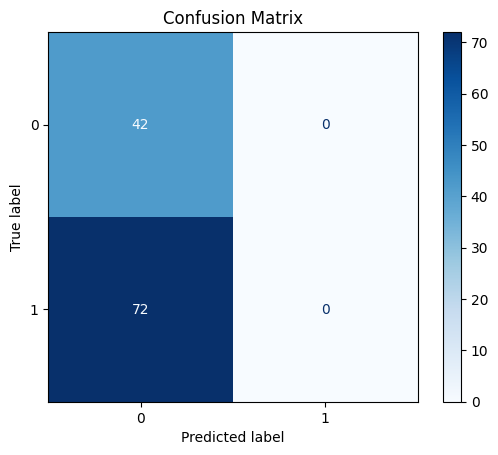

In [77]:
y_pred = xgb.predict(x_test_xgb)
cm = confusion_matrix(y_test_xgb, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Train ROC AUC Score: 0.9992
Test ROC AUC Score: 0.9861


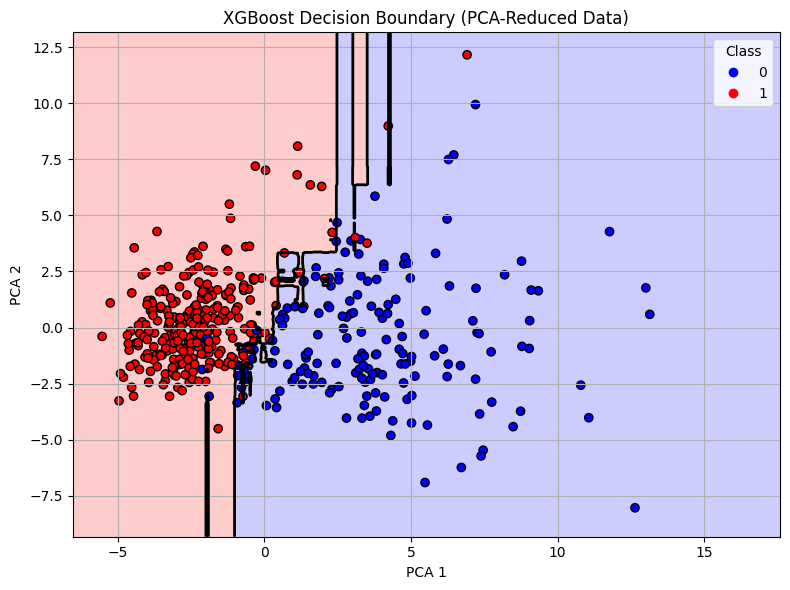

In [49]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

st = StandardScaler()
x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

xgb_params = {'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.8}

xgb = XGBClassifier(**xgb_params)
xgb.fit(x_train_pca, y_train)

y_proba_train = xgb.predict_proba(x_train_pca)[:, 1]
y_proba_test = xgb.predict_proba(x_test_pca)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train, y_proba_train):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}")

x_min, x_max = np.vstack((x_train_pca, x_test_pca))[:, 0].min() - 1, np.vstack((x_train_pca, x_test_pca))[:, 0].max() + 1
y_min, y_max = np.vstack((x_train_pca, x_test_pca))[:, 1].min() - 1, np.vstack((x_train_pca, x_test_pca))[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = xgb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('XGBoost Decision Boundary (PCA-Reduced Data)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()

## LGBM

In [53]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

samplers = {
    'ros': RandomOverSampler(random_state=42),
    'smote': SMOTE(random_state=42, k_neighbors=4),
    'none': None 
}

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [15, 31],
    'min_child_samples': [10, 20],
    'subsample': [0.6, 0.8, 1.0]
}

results_lgbm = []

for scaler_name, scaler in scalers.items():
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for sampler_name, sampler in samplers.items():
        if sampler is None:
            x_res, y_res = x_train_scaled, y_train
        else:
            try:
                x_res, y_res = sampler.fit_resample(x_train_scaled, y_train)
            except Exception as e:
                results_lgbm.append({
                    'Scaler': scaler_name,
                    'Sampler': sampler_name,
                    'BestParams': str(e),
                    'Train_ROC_AUC': None,
                    'Test_ROC_AUC': None
                })
                continue

        lgbm = LGBMClassifier(random_state=42)

        try:
            grid_search = GridSearchCV(
                estimator=lgbm,
                param_grid=param_grid,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1
            )
            grid_search.fit(x_res, y_res)

            best_lgbm = grid_search.best_estimator_

            y_proba_train = best_lgbm.predict_proba(x_res)[:, 1]
            y_proba_test = best_lgbm.predict_proba(x_test_scaled)[:, 1]

            results_lgbm.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': grid_search.best_params_,
                'Train_ROC_AUC': roc_auc_score(y_res, y_proba_train),
                'Test_ROC_AUC': roc_auc_score(y_test, y_proba_test)
            })

        except Exception as e:
            results_lgbm.append({
                'Scaler': scaler_name,
                'Sampler': sampler_name,
                'BestParams': str(e),
                'Train_ROC_AUC': None,
                'Test_ROC_AUC': None
            })

results_df_lgbm = pd.DataFrame(results_lgbm)
results_df_lgbm.sort_values(by='Test_ROC_AUC', ascending=False).reset_index(drop=True)

[LightGBM] [Info] Number of positive: 285, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5568
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

,Scaler,Sampler,BestParams,Train_ROC_AUC,Test_ROC_AUC
0,minmax,ros,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.991071
1,standard,ros,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.990741
2,standard,none,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.990741
3,minmax,none,"{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",1.0,0.990410
4,minmax,smote,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.989418
5,standard,smote,"{'learning_rate': 0.1, 'max_depth': 3, 'min_ch...",1.0,0.988757
6,robust,none,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.988757
7,robust,ros,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.988426
8,robust,smote,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",1.0,0.985780


In [83]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train_lgbm, x_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

st = StandardScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.transform(x_test)

lgb_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'min_child_samples': 9,
    'n_estimators': 35,
    'num_leaves': 7,
    'subsample': 0.6
}

lgb = LGBMClassifier(**lgb_params)
lgb.fit(x_train_scaled, y_train_lgbm)

y_proba_train = lgb.predict_proba(x_train_scaled)[:, 1]
y_proba_test = lgb.predict_proba(x_test_scaled)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train_lgbm, y_proba_train):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test_lgbm, y_proba_test):.4f}")

[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4545
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
Train ROC AUC Score: 1.0000
Test ROC AUC Score: 0.9940


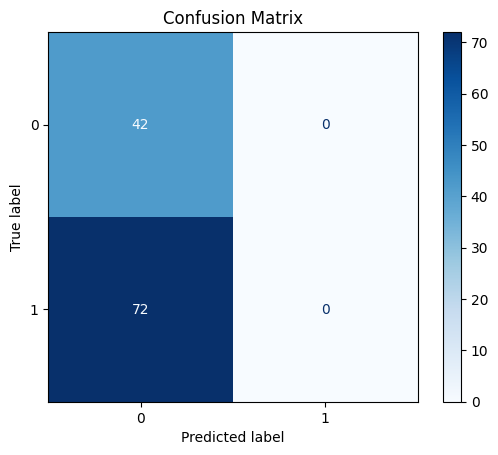

In [85]:
y_pred = lgb.predict(x_test_lgbm)
cm = confusion_matrix(y_test_lgbm, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
Train ROC AUC Score: 0.9969
Test ROC AUC Score: 0.9831


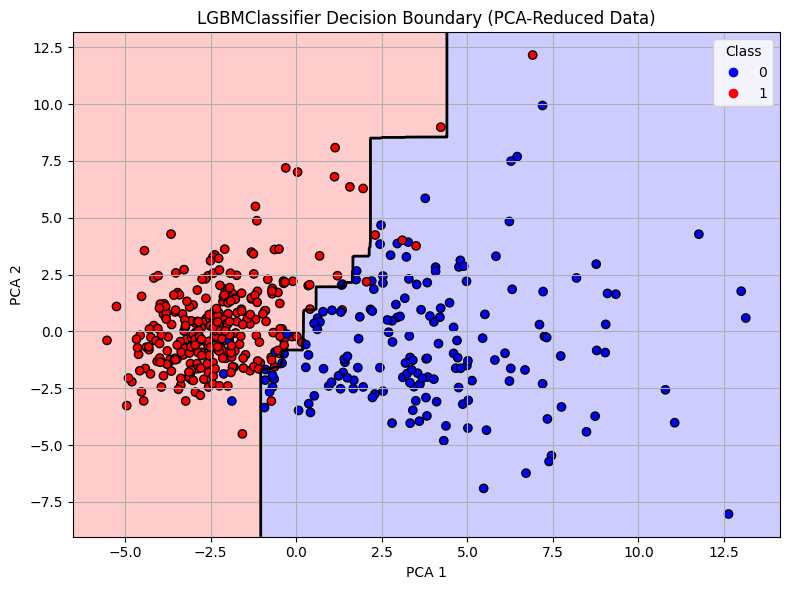

In [52]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

st = StandardScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

lgb_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'min_child_samples': 9,
    'n_estimators': 35,
    'num_leaves': 7,
    'subsample': 0.6
}

lgb = LGBMClassifier(**lgb_params)
lgb.fit(x_train_pca, y_train)

y_proba_train = lgb.predict_proba(x_train_pca)[:, 1]
y_proba_test = lgb.predict_proba(x_test_pca)[:, 1]

print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_proba_train):.4f}')
print(f'Test ROC AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}')

x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = lgb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('LGBMClassifier Decision Boundary (PCA-Reduced Data)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()

## catboost

In [95]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train_cat, x_test_cat, y_train_cat, y_test_cat = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42)

st = StandardScaler()

x_train_cat = st.fit_transform(x_train_cat)
x_test_cat = st.transform(x_test_cat)

cat = CatBoostClassifier(
    iterations=10,
    l2_leaf_reg=4,
    depth=6,
    learning_rate=0.2, 
    random_state=42,
    border_count=32,
    eval_metric='AUC',
    grow_policy='SymmetricTree',
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=100,
)

train_pool = Pool(x_train_cat, y_train_cat)
test_pool = Pool(x_test_cat, y_test_cat)

cat.fit(train_pool, eval_set=test_pool)

y_proba_test_cat = cat.predict_proba(x_test_cat)[:, 1]
y_proba_train_cat = cat.predict_proba(x_train_cat)[:, 1]

print(f"Train ROC AUC Score: {roc_auc_score(y_train_cat, y_proba_train_cat):.4f}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test_cat, y_proba_test_cat):.4f}")

0:	test: 0.9801587	best: 0.9801587 (0)	total: 2.03ms	remaining: 18.3ms
9:	test: 0.9890873	best: 0.9904101 (6)	total: 21.3ms	remaining: 0us

bestTest = 0.9904100529
bestIteration = 6

Shrink model to first 7 iterations.
Train ROC AUC Score: 0.9989
Test ROC AUC Score: 0.9904


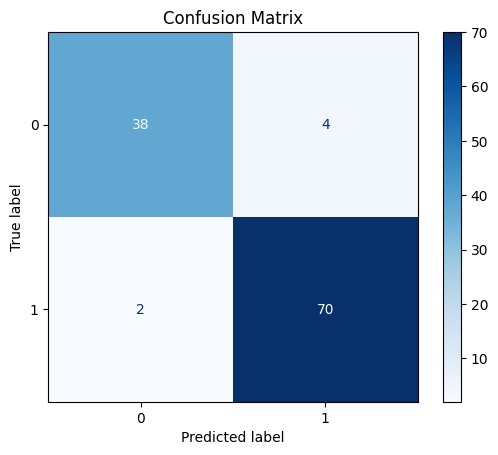

In [96]:
y_pred = cat.predict(x_test_cat)
cm = confusion_matrix(y_test_cat, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

0:	test: 0.9399802	best: 0.9399802 (0)	total: 1.35ms	remaining: 134ms
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.9819775132
bestIteration = 11

Shrink model to first 12 iterations.
score_train: 0.9882
score_test: 0.9820


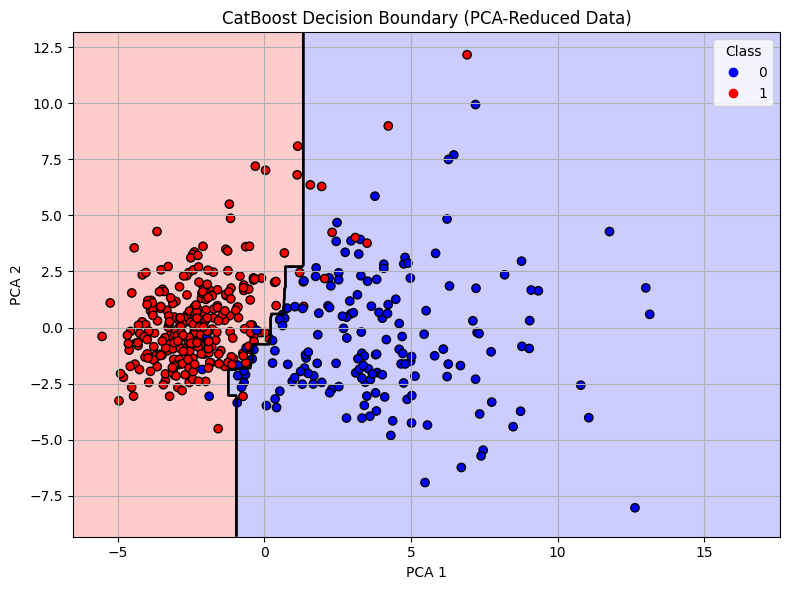

In [99]:
x = df_train.iloc[:, :-1].copy()
y = df_train.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42
)

st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

cat = CatBoostClassifier(
    iterations=100,
    l2_leaf_reg=2,
    depth=6,
    learning_rate=0.2, 
    random_state=42,
    border_count=32,
    eval_metric='AUC',
    grow_policy='SymmetricTree',
    use_best_model=True,
    early_stopping_rounds=5, 
    verbose=100,
)

train_pool = Pool(x_train_pca, y_train)
test_pool = Pool(x_test_pca, y_test)

cat.fit(train_pool, eval_set=test_pool)

y_proba_test = cat.predict_proba(x_test_pca)[:, 1]
y_proba_train = cat.predict_proba(x_train_pca)[:, 1]

print(f'score_train: {roc_auc_score(y_train, y_proba_train):.4f}')
print(f'score_test: {roc_auc_score(y_test, y_proba_test):.4f}')

x_all_pca = np.vstack([x_train_pca, x_test_pca])  
x_min, x_max = x_all_pca[:, 0].min() - 1, x_all_pca[:, 0].max() + 1
y_min, y_max = x_all_pca[:, 1].min() - 1, x_all_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = cat.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('CatBoost Decision Boundary (PCA-Reduced Data)')
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()
